In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import zscore

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
pprint(mongo.list_database_names())


['admin',
 'autosaurus',
 'classDB',
 'config',
 'epa',
 'fruits_db',
 'local',
 'met',
 'petsitly_marketing',
 'project3',
 'uk_food']


In [4]:
db = mongo['project3']

In [5]:
print(db.list_collection_names())

['emissions', 'gdp', 'population', 'agriculture', 'pesticides']


In [6]:
emissions = db['emissions']
gdp = db['gdp']
population = db['population']
agriculture = db['agriculture']
pesticides = db['pesticides']

In [7]:
#Grabbing each collection into a giant DataFrame
emi_docu = emissions.find()
emi_list = list(emi_docu)
emi_df = pd.DataFrame(emi_list)

gdp_docu = gdp.find()
gdp_list = list(gdp_docu)
gdp_df = pd.DataFrame(gdp_list)

pop_docu =population.find()
pop_list = list(pop_docu)
pop_df = pd.DataFrame(pop_list)

agr_docu = agriculture.find()
agr_list = list(agr_docu)
agr_df = pd.DataFrame(agr_list)

pest_docu = pesticides.find()
pest_list = list(pest_docu)
pest_df = pd.DataFrame(pest_list)

print(emi_df.columns)
print(gdp_df.columns)
print(pop_df.columns)
print(agr_df.columns)
print(pest_df.columns)

Index(['_id', 'Code', 'Country', 'Year', 'CO2_Emissions'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'GDP', 'Ag_perc_GDP', 'Agri_GDP'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Population'], dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha'],
      dtype='object')
Index(['_id', 'Country', 'Code', 'Year', 'Total_Pesticides'], dtype='object')


In [9]:
#Merge all dataframes
complete_df = pd.merge(emi_df, gdp_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id_x', '_id_y'])

complete_df = pd.merge(complete_df, pop_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df = pd.merge(complete_df, agr_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df = pd.merge(complete_df, pest_df, how = 'left', left_on = ['Code', 'Country', 'Year'], right_on = ['Code', 'Country', 'Year']).dropna()
complete_df = complete_df.drop(columns = ['_id'])

complete_df         

Code   Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
0     ALB   Albania  1996    1940.000000  1.506738e+10     0.364109   
1     ALB   Albania  1997    1470.000000  1.407231e+10     0.315434   
2     ALB   Albania  1998    1790.000000  1.553170e+10     0.287857   
3     ALB   Albania  1999    2970.000000  1.652540e+10     0.259187   
4     ALB   Albania  2000    3170.000000  1.663327e+10     0.245154   
...   ...       ...   ...            ...           ...          ...   
3931  ZWE  Zimbabwe  2015   12430.000305  3.979864e+10     0.082842   
3932  ZWE  Zimbabwe  2016   11020.000458  4.096319e+10     0.078740   
3933  ZWE  Zimbabwe  2017   10340.000153  4.431674e+10     0.083410   
3934  ZWE  Zimbabwe  2018   12380.000114  4.342090e+10     0.073194   
3935  ZWE  Zimbabwe  2019   11760.000229  4.082657e+10     0.098193   

          Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
0     5.486161e+09     3245681           27400.0     41.277372   
1     4.438891e+09     3229665           27400.0     41.423358   
2     4.470902e+09     3210133           27400.0     41.569343   
3     4.283176e+09     3188596           27400.0     41.788321   
4     4.077715e+09     3166147           27400.0     41.751825   
...            ...         ...               ...           ...   
3931  3.297018e+09    14399009          386850.0     41.876696   
3932  3.225436e+09    14600297          386850.0     41.876696   
3933  3.696446e+09    14812484          386850.0     41.876696   
3934  3.178138e+09    15034457          386850.0     41.876696   
3935  4.008868e+09    15271377          386850.0     41.876696   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides  
0           1131000.0             854.895696            262.40  
1           1135000.0             847.477792            273.79  
2           1139000.0             850.488892            285.19  
3           1145000.0             838.611694            296.59  
4           1144000.0             853.764694            307.98  
...               ...                    ...               ...  
3931       16200000.0             775.884894           2185.07  
3932       16200000.0             777.129893           2185.07  
3933       16200000.0             774.345388           2185.07  
3934       16200000.0             780.655493           2185.07  
3935       16200000.0             777.940795           2185.07  

[3936 rows x 13 columns]

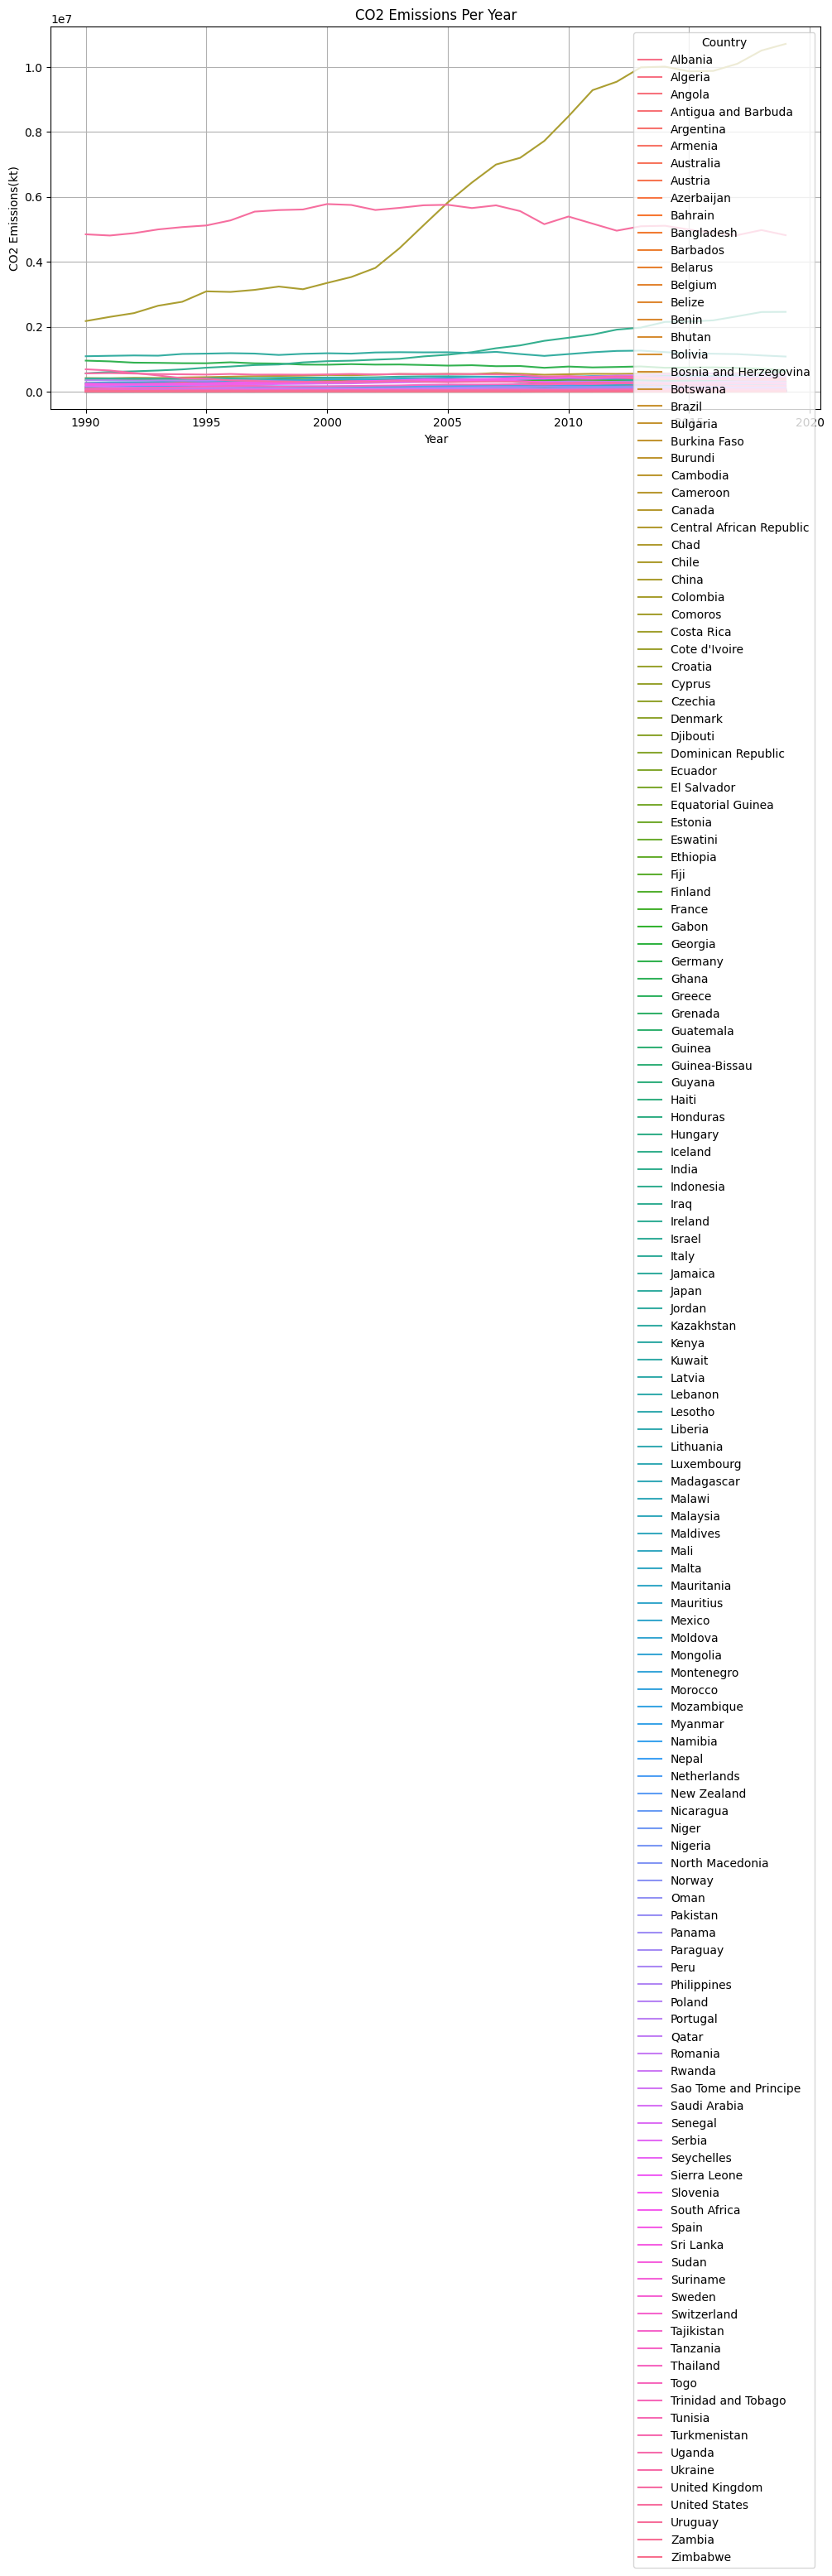

In [10]:
#Plotting emissions by country
plt.figure(figsize=(12,6))
sns.lineplot(data=emi_df, x='Year', y='CO2_Emissions', hue='Country')

plt.title('CO2 Emissions Per Year')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions(kt)')
plt.legend(title='Country')
plt.grid(True)

plt.show()

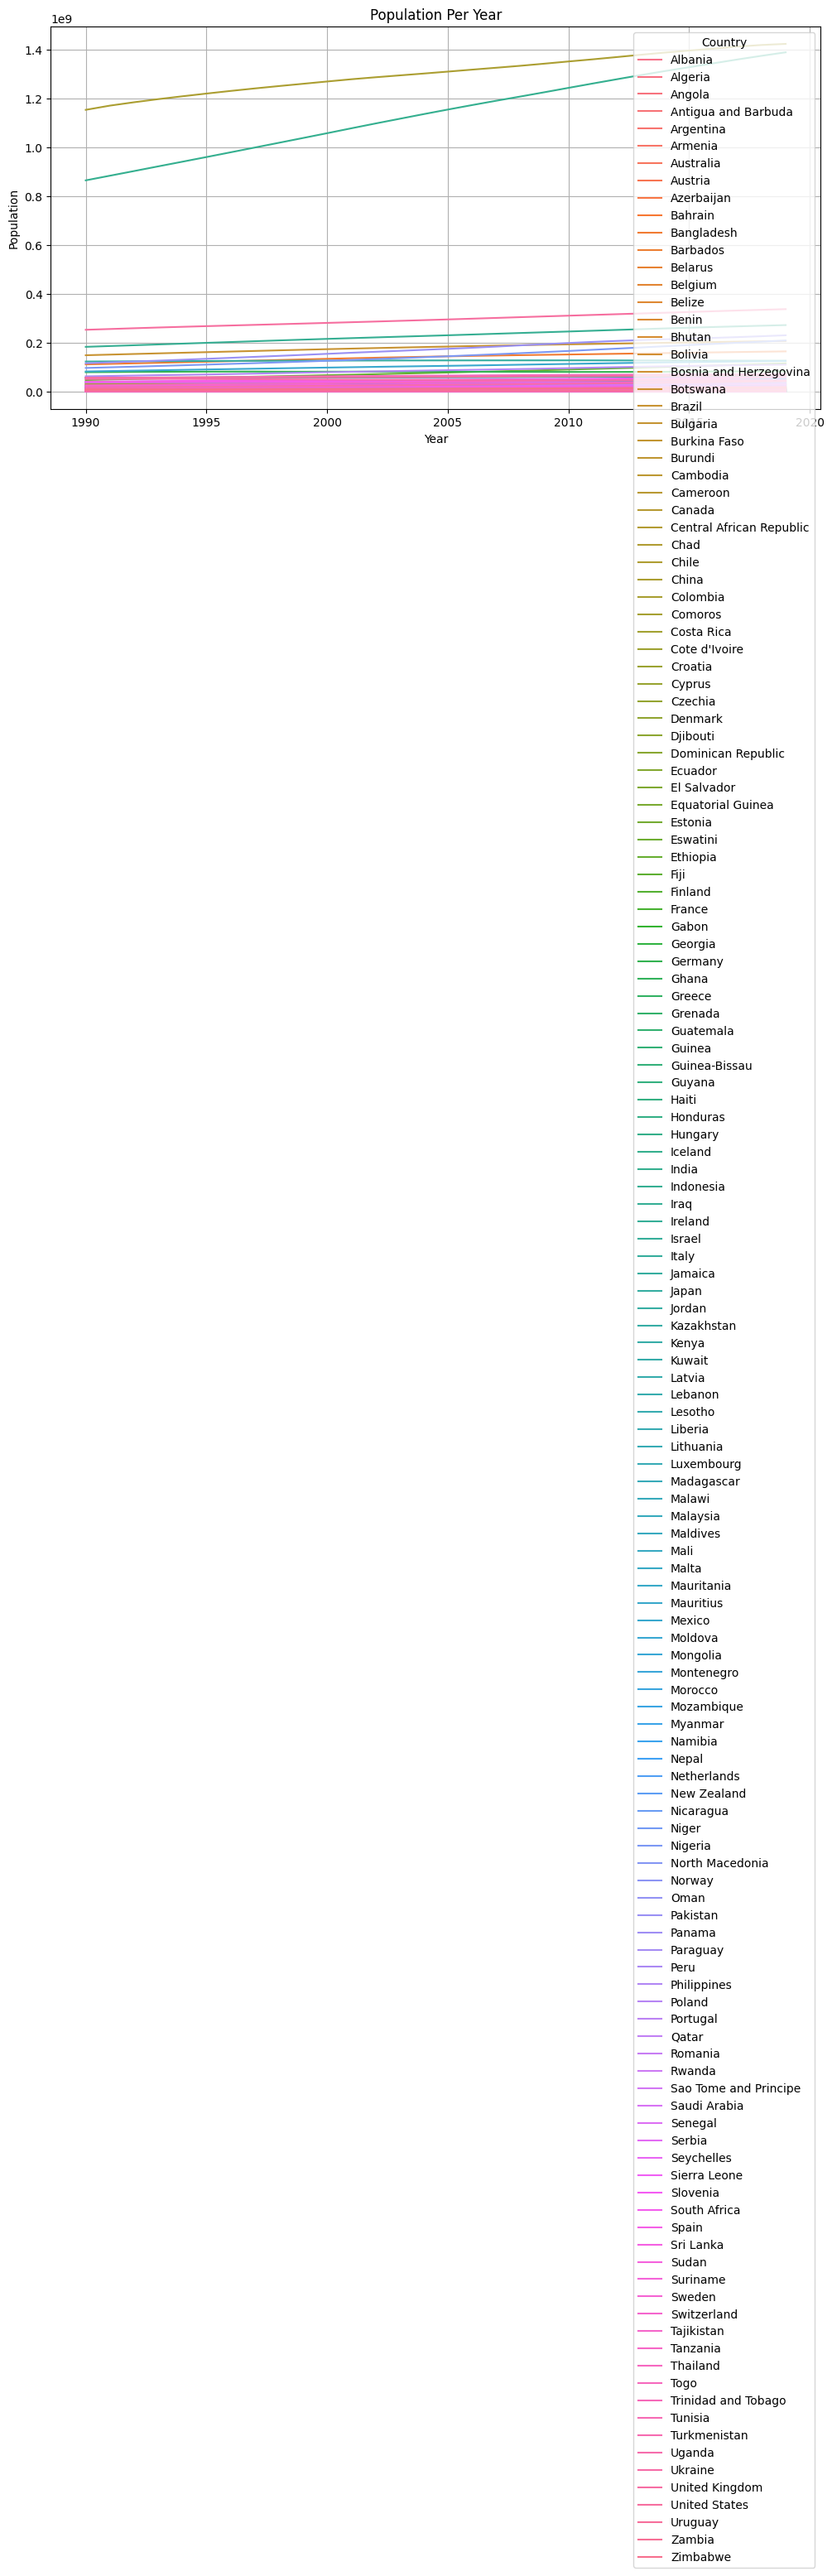

In [11]:
#Plotting population by country
plt.figure(figsize=(12,6))
sns.lineplot(data=pop_df, x='Year', y='Population', hue='Country')

plt.title('Population Per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.grid(True)

plt.show()

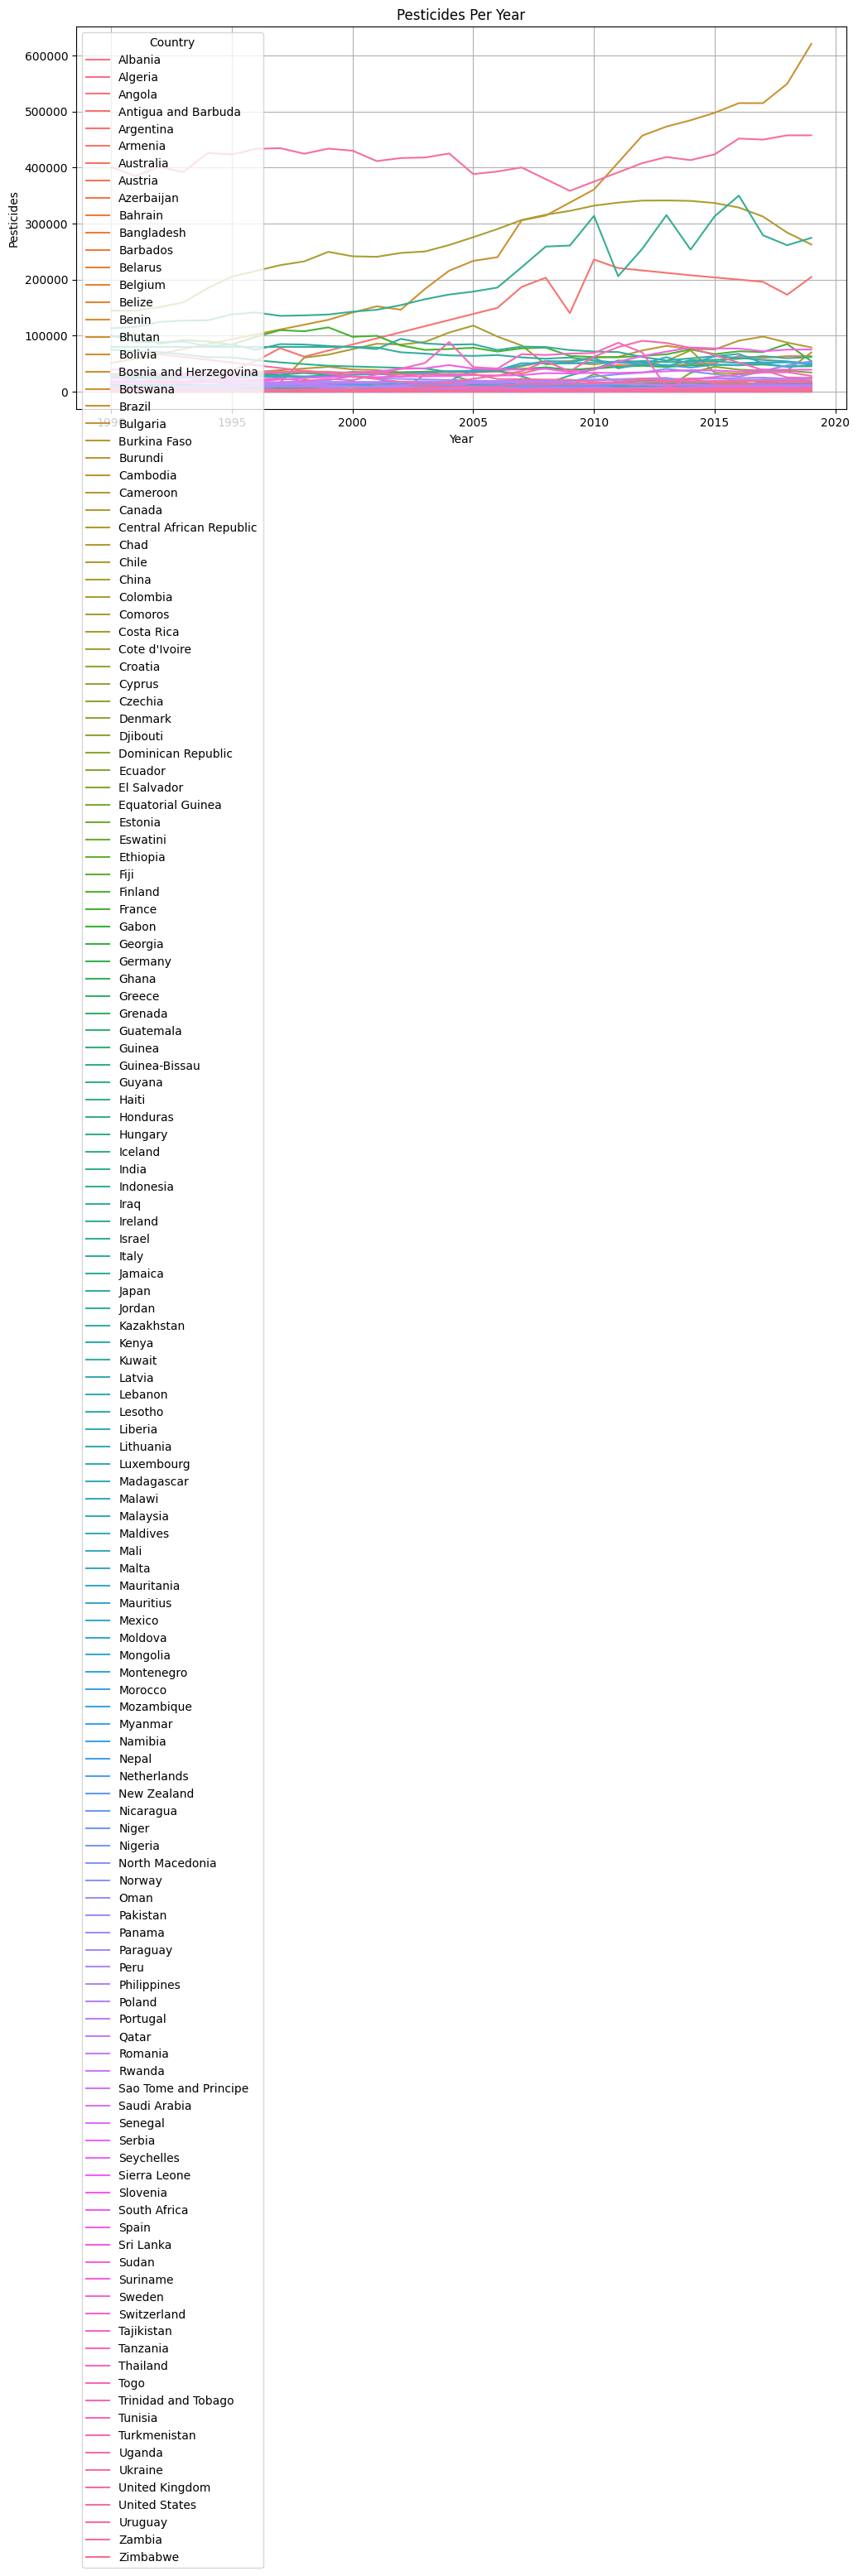

In [12]:
#Plotting pesticides by country
plt.figure(figsize=(12,6))
sns.lineplot(data=pest_df, x='Year', y='Total_Pesticides', hue='Country')

plt.title('Pesticides Per Year')
plt.xlabel('Year')
plt.ylabel('Pesticides')
plt.legend(title='Country')
plt.grid(True)

plt.show()

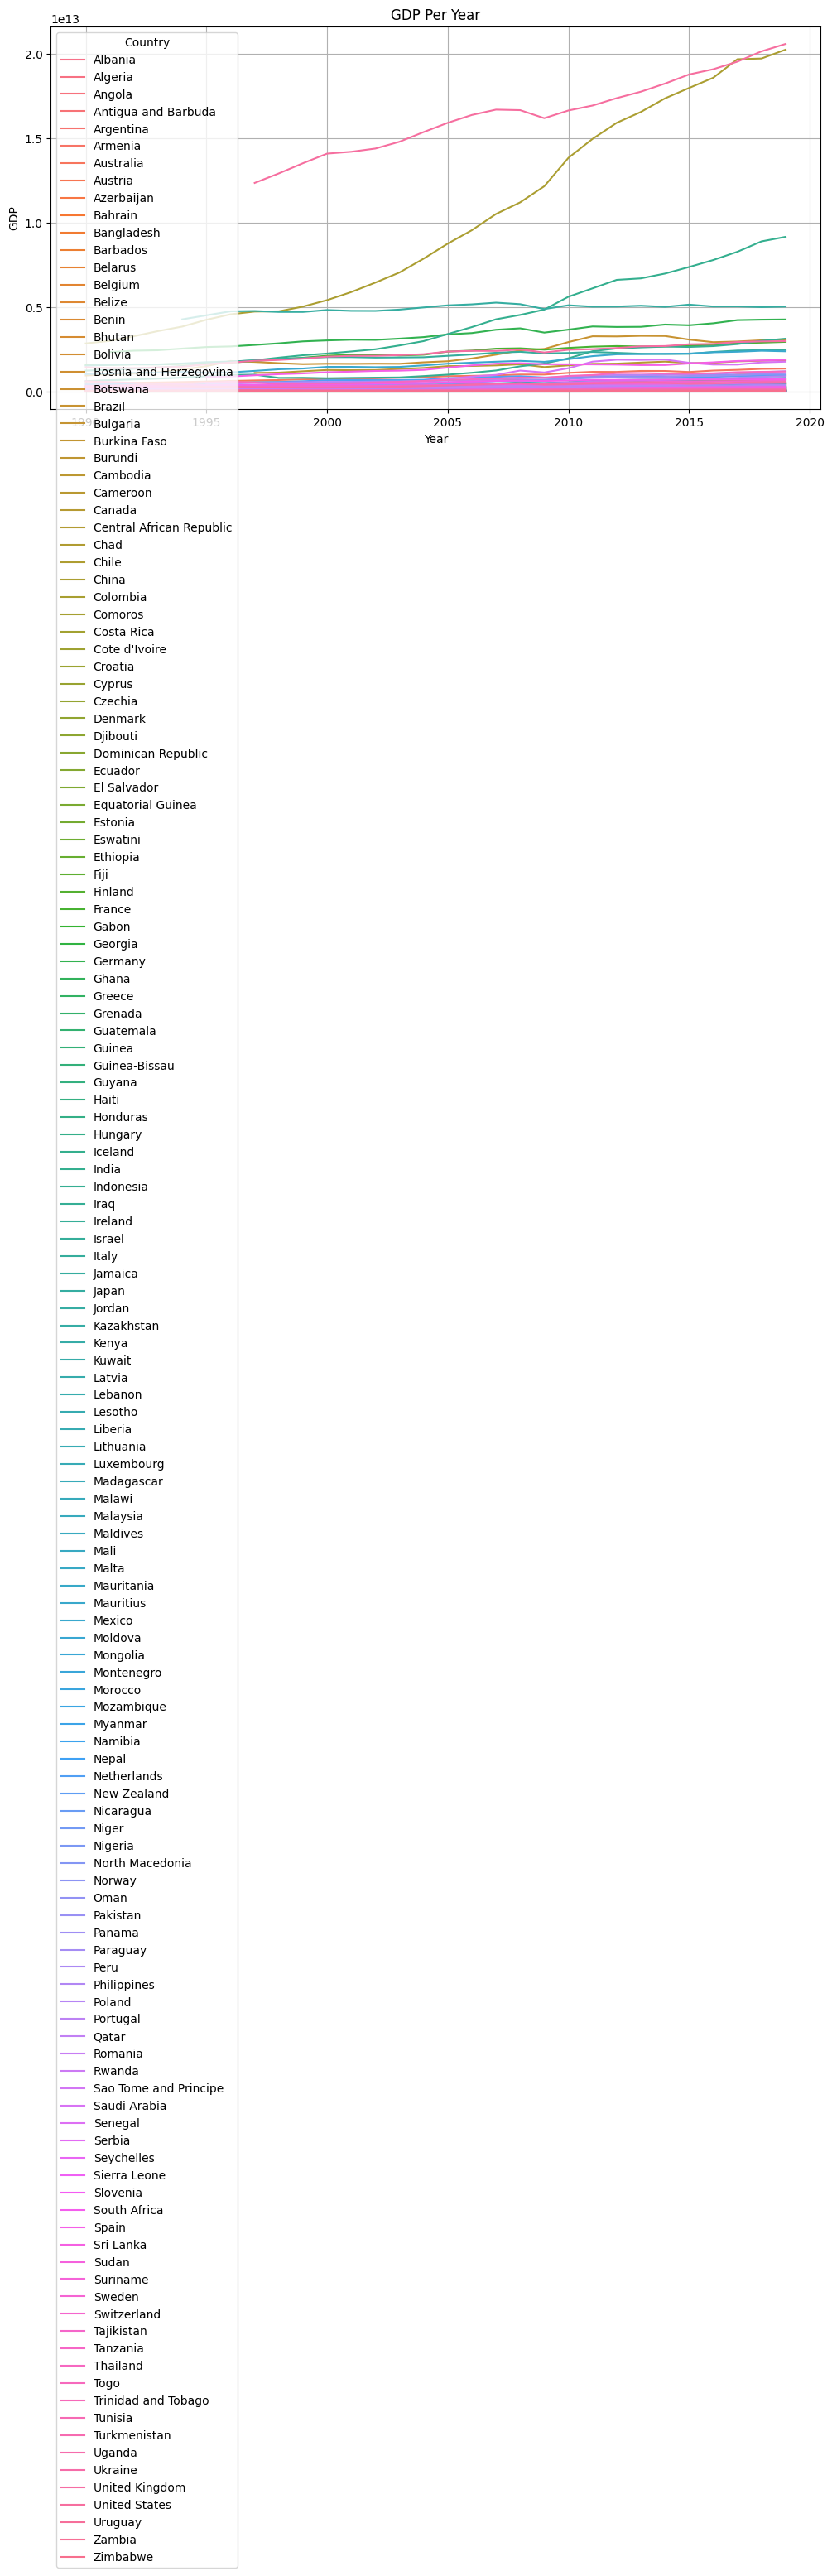

In [13]:
#Plotting gdp by country
plt.figure(figsize=(12,6))
sns.lineplot(data=gdp_df, x='Year', y='GDP', hue='Country')

plt.title('GDP Per Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

plt.show()

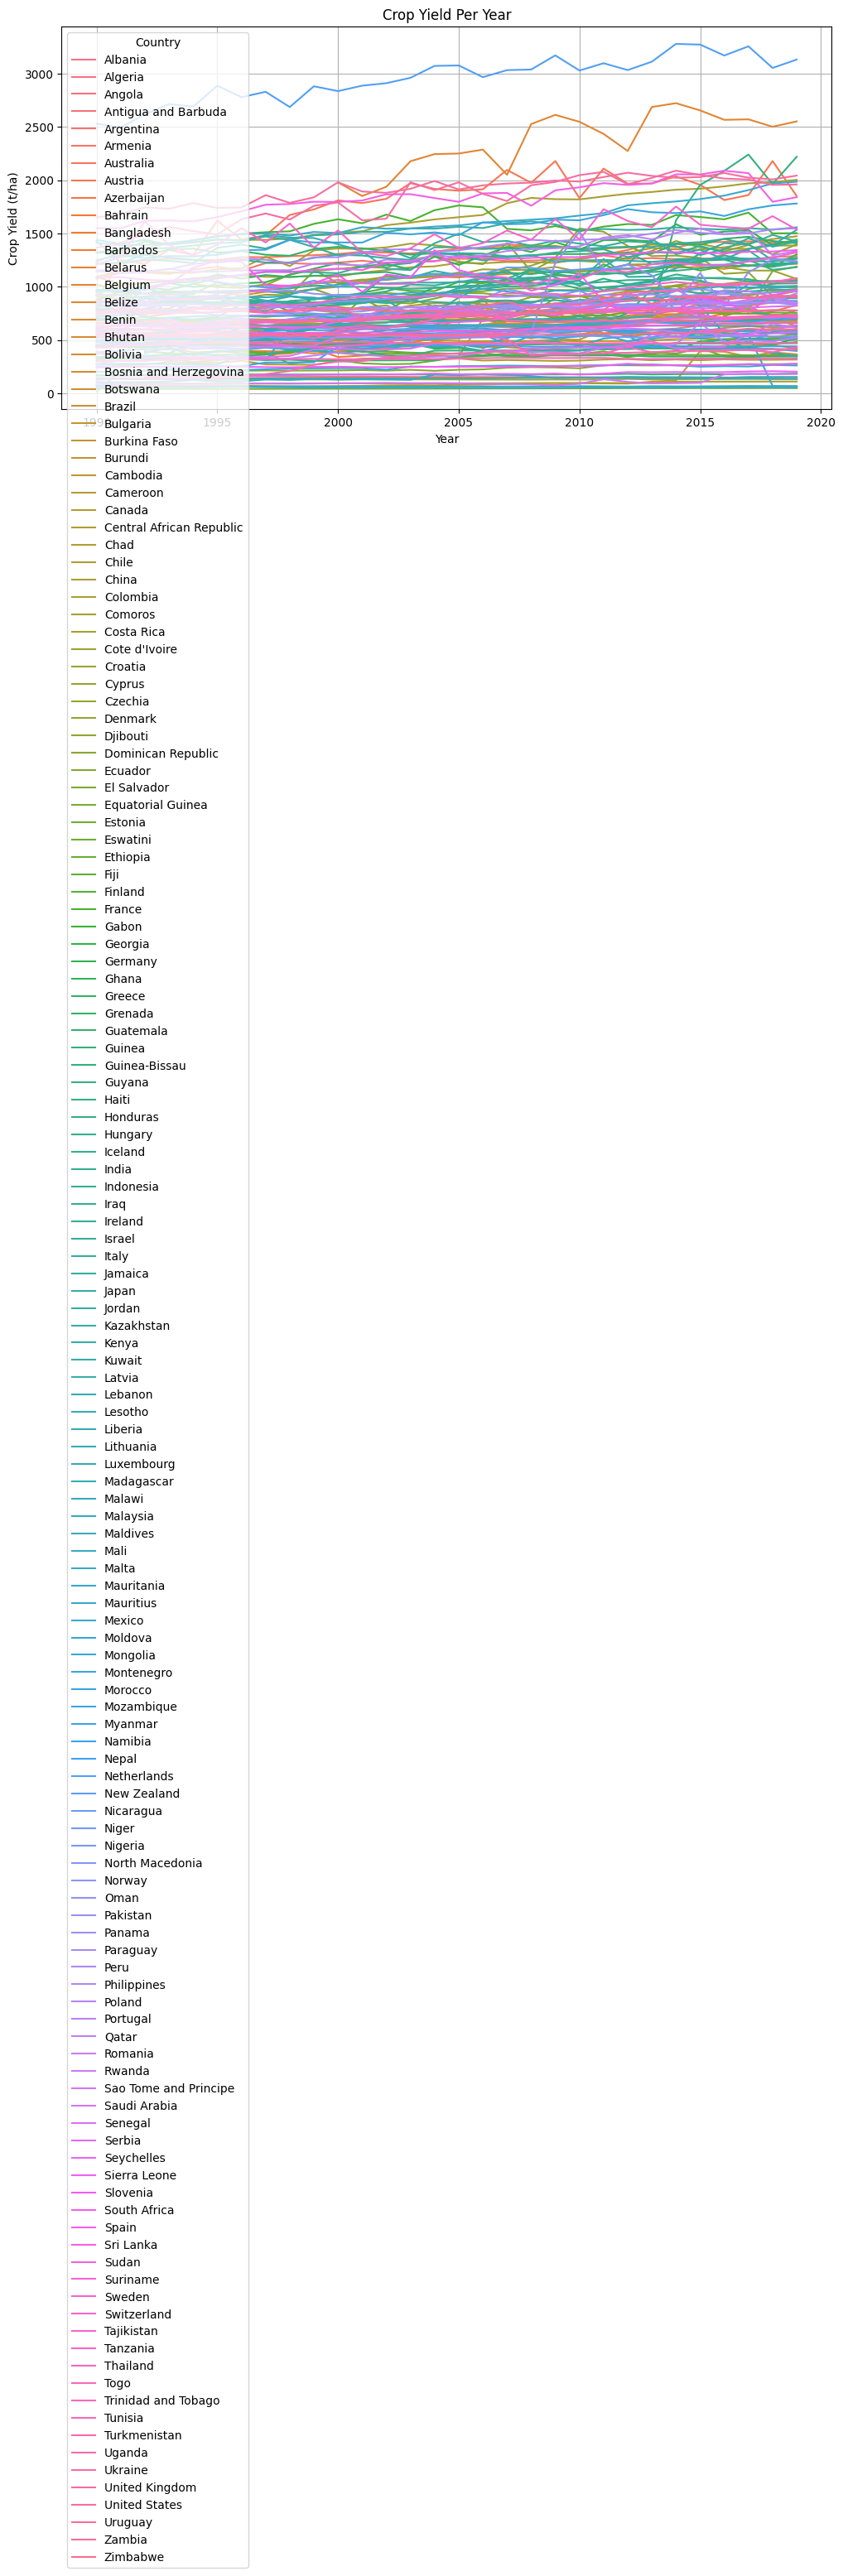

In [14]:
#Plotting crop yield by country
plt.figure(figsize=(12,6))
sns.lineplot(data=agr_df, x='Year', y='Total_Crop_Yield_t_ha', hue='Country')

plt.title('Crop Yield Per Year')
plt.xlabel('Year')
plt.ylabel('Crop Yield (t/ha)')
plt.legend(title='Country')
plt.grid(True)

plt.show()

In [15]:
complete_df.columns

Index(['Code', 'Country', 'Year', 'CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides'],
      dtype='object')

In [16]:
import pandas as pd
from scipy.stats import zscore


def find_outliers(df, column_name, threshold=3):
    # Calculate Z-scores for the specified column
    df['Z-Score'] = zscore(df[column_name], nan_policy='omit')

    # Identify rows with Z-scores that exceed the threshold
    df['Is-Outlier'] = df['Z-Score'].abs() > threshold

    # Isolate outlier rows
    outliers_df = df[df['Is-Outlier']]

    return outliers_df



In [17]:
# Specify the column for which to calculate Z-scores and find outliers
column_name = ['CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
for name in column_name:
    holder = name
    # Find and isolate outliers
    outliers = find_outliers(complete_df, name)
    print(f'Outliers for {name}: {outliers}')



Outliers for CO2_Emissions:      Code        Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
796   CHN          China  1992   2.418180e+06  3.285450e+12     0.213289   
797   CHN          China  1993   2.645410e+06  3.587540e+12     0.193075   
798   CHN          China  1994   2.767670e+06  3.854175e+12     0.194743   
799   CHN          China  1995   3.088620e+06  4.257891e+12     0.195965   
800   CHN          China  1996   3.070510e+06  4.580774e+12     0.193255   
801   CHN          China  1997   3.134110e+06  4.742227e+12     0.178953   
802   CHN          China  1998   3.236280e+06  4.759018e+12     0.171590   
803   CHN          China  1999   3.153660e+06  5.037557e+12     0.160648   
804   CHN          China  2000   3.346530e+06  5.420107e+12     0.146762   
805   CHN          China  2001   3.529080e+06  5.898086e+12     0.139835   
806   CHN          China  2002   3.810060e+06  6.458509e+12     0.133015   
807   CHN          China  2003   4.415910e+06  7.056662e+12 

In [40]:
#Z-score func
def calculate_z_score(df, column_name, threshold=3):
    # Calculate Z-scores for the specified column
    df['Z-Score'] = zscore(df[column_name], nan_policy='omit')
    
    # Identify rows with Z-scores that exceed the threshold
    df['Is-Outlier'] = df['Z-Score'].abs() > threshold
    return df


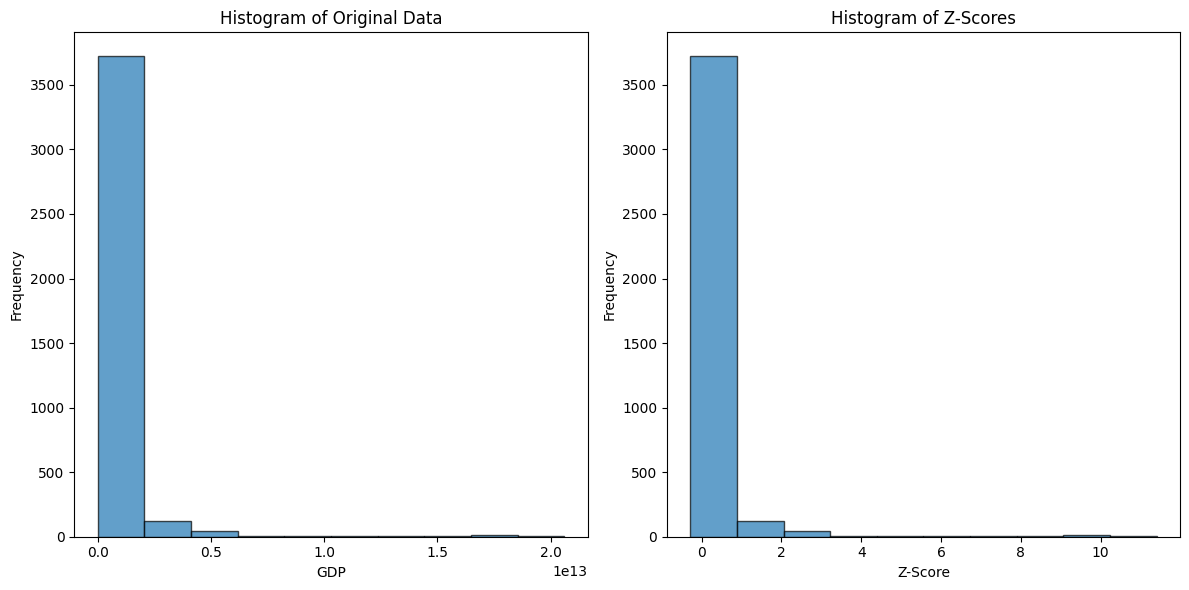

In [41]:
#Histogram for gdp
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(12, 6))

# Histogram of the original data
plt.subplot(1, 2, 1)
plt.hist(gdp_ztest[name], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Original Data')
plt.xlabel(name)
plt.ylabel('Frequency')

# Histogram of Z-scores
plt.subplot(1, 2, 2)
plt.hist(gdp_ztest['Z-Score'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

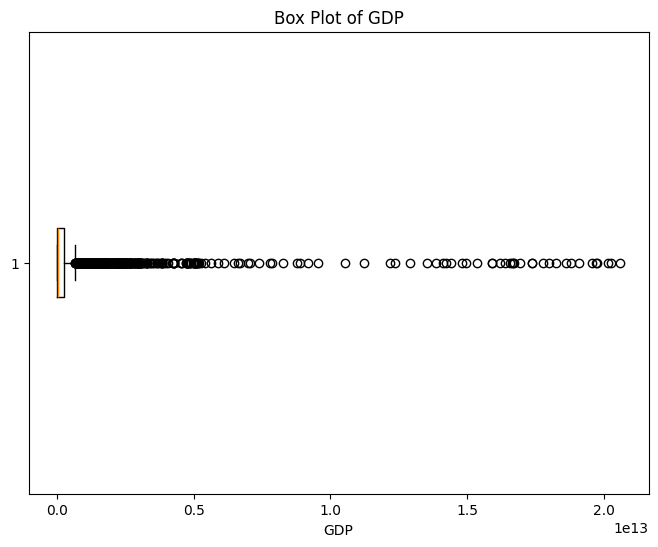

In [42]:
#Box Plot of gdp
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(8, 6))
plt.boxplot(gdp_ztest[name], vert=False)
plt.title('Box Plot of ' + name)
plt.xlabel(name)
plt.show()

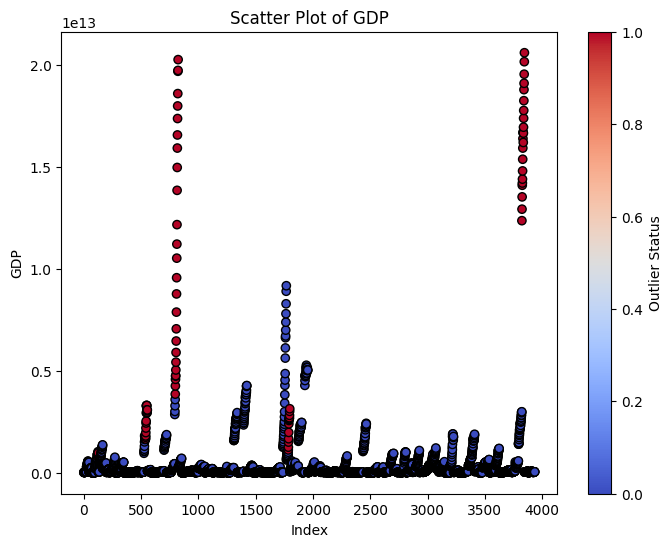

In [31]:
#Scatter plot gdp vs. index
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)

plt.figure(figsize=(8, 6))
plt.scatter(gdp_ztest.index, gdp_ztest[name], c=gdp_ztest['Is-Outlier'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot of ' + name)
plt.xlabel('Index')
plt.ylabel(name)
plt.colorbar(label='Outlier Status')
plt.show()

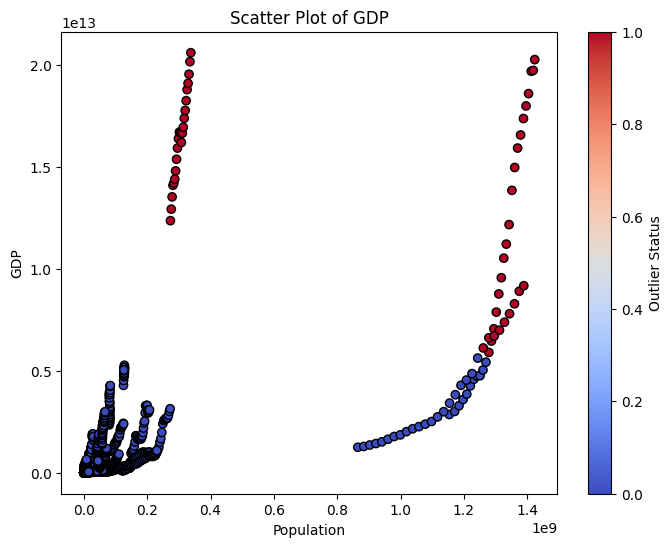

In [44]:
#Scatter plot vs population
name = 'GDP'   
gdp_ztest = calculate_z_score(complete_df, name)
test_name = 'Population'

plt.figure(figsize=(8, 6))
plt.scatter(gdp_ztest[test_name], gdp_ztest[name], c=gdp_ztest['Is-Outlier'], cmap='coolwarm', edgecolor='k')
plt.title('Scatter Plot of ' + name)
plt.xlabel(test_name)
plt.ylabel(name)
plt.colorbar(label='Outlier Status')
plt.show()

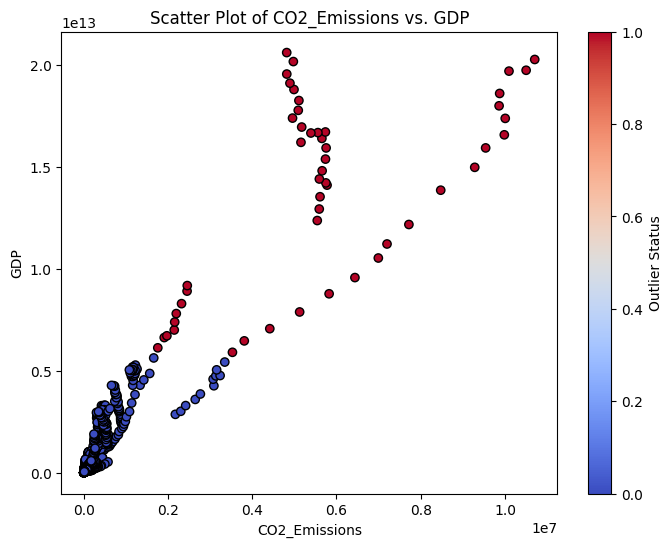

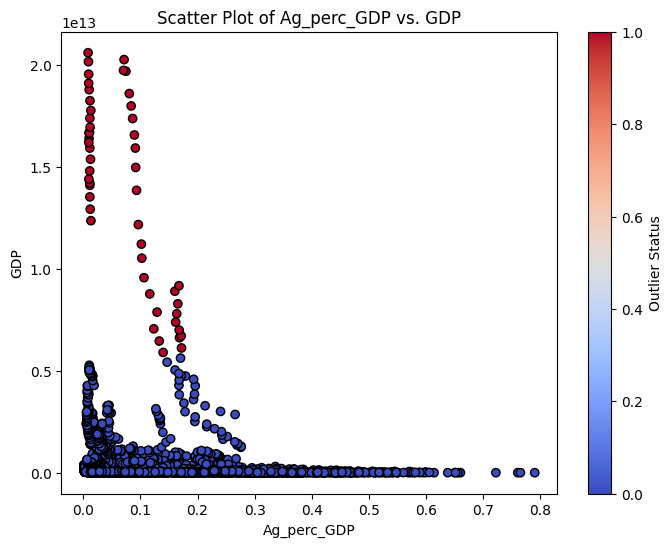

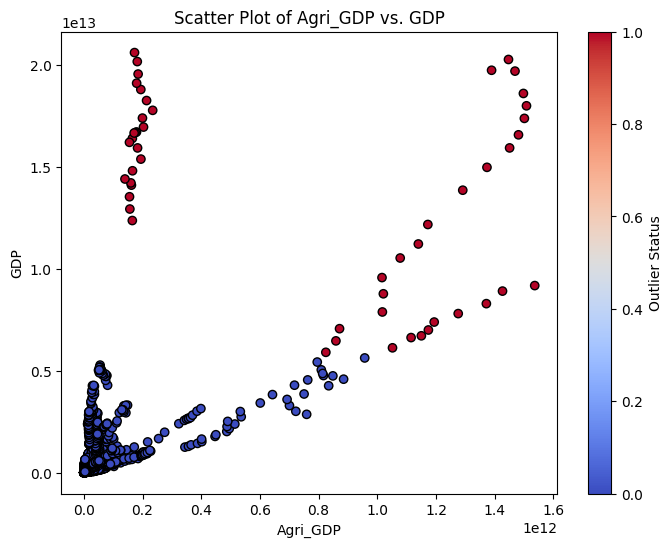

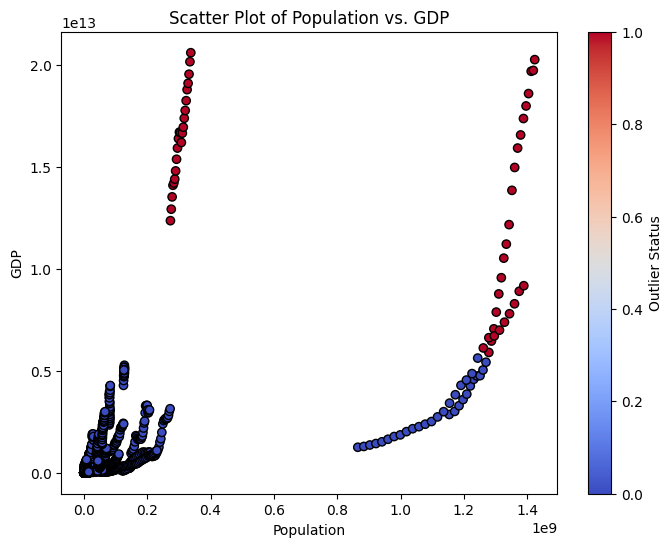

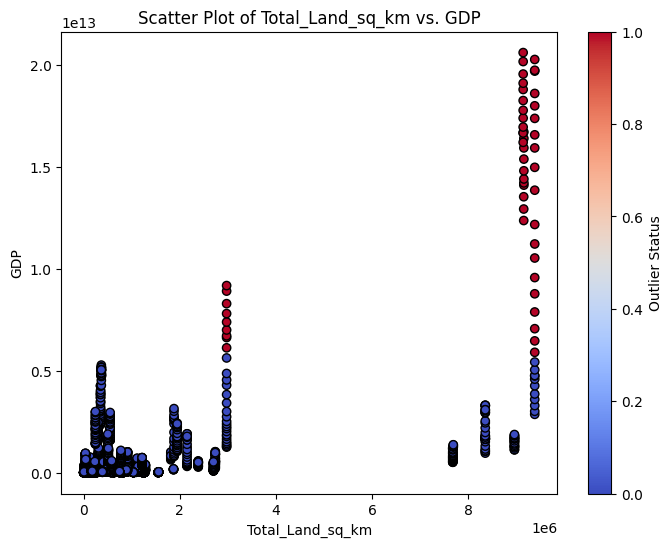

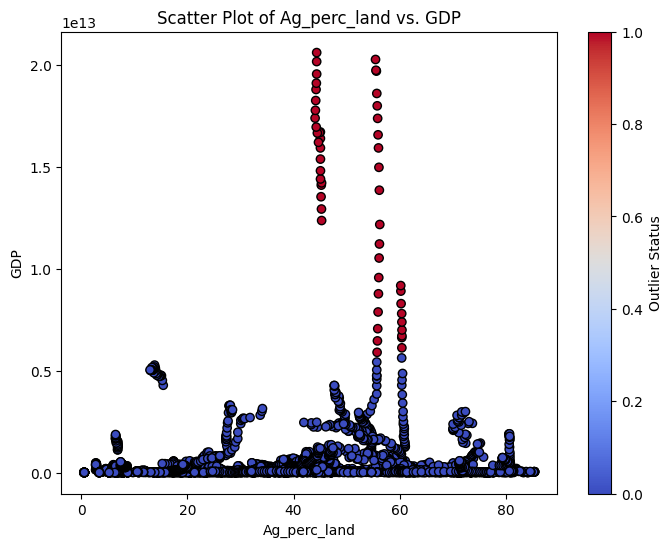

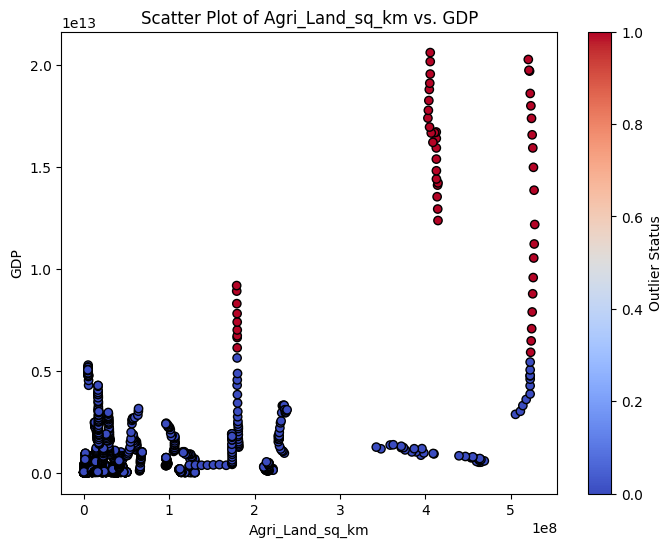

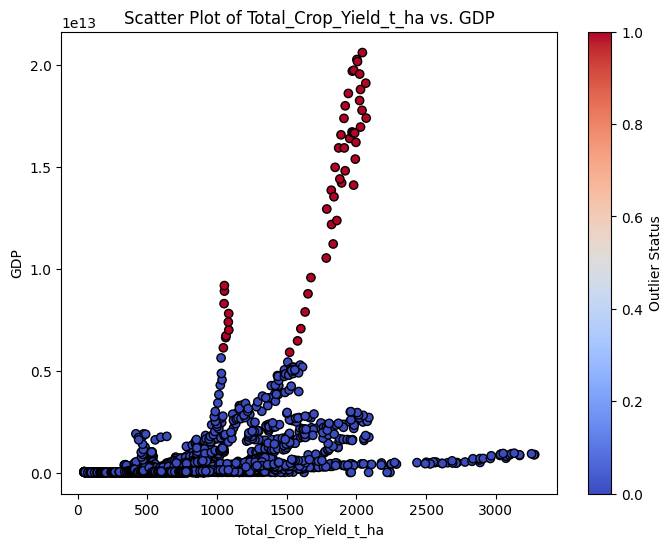

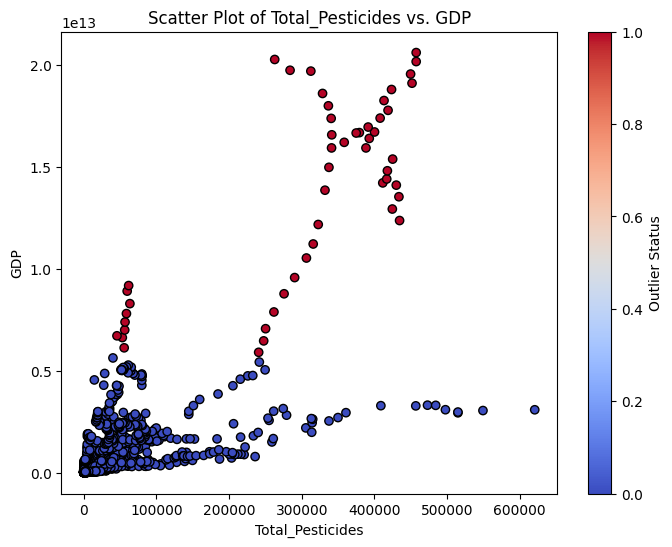

In [49]:
def plot_scatter(df, name, features):   
    z_holder = calculate_z_score(df, name)
    
    for f in features:
        

        plt.figure(figsize=(8, 6))
        plt.scatter(z_holder[f], z_holder[name], c=z_holder['Is-Outlier'], cmap='coolwarm', edgecolor='k')
        plt.title('Scatter Plot of ' + f +' vs. '+ name)
        plt.xlabel(f)
        plt.ylabel(name)
        plt.colorbar(label='Outlier Status')
        plt.show()

column_test = ['CO2_Emissions', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

plot_scatter(complete_df, 'GDP', column_test)

In [30]:
column_name = ['CO2_Emissions', 'GDP', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']
column_name = ['CO2_Emissions', 'Ag_perc_GDP',
       'Agri_GDP', 'Population', 'Total_Land_sq_km', 'Ag_perc_land',
       'Agri_Land_sq_km', 'Total_Crop_Yield_t_ha', 'Total_Pesticides']

Code   Country  Year  CO2_Emissions           GDP  Ag_perc_GDP  \
0     ALB   Albania  1996    1940.000000  1.506738e+10     0.364109   
1     ALB   Albania  1997    1470.000000  1.407231e+10     0.315434   
2     ALB   Albania  1998    1790.000000  1.553170e+10     0.287857   
3     ALB   Albania  1999    2970.000000  1.652540e+10     0.259187   
4     ALB   Albania  2000    3170.000000  1.663327e+10     0.245154   
...   ...       ...   ...            ...           ...          ...   
3931  ZWE  Zimbabwe  2015   12430.000305  3.979864e+10     0.082842   
3932  ZWE  Zimbabwe  2016   11020.000458  4.096319e+10     0.078740   
3933  ZWE  Zimbabwe  2017   10340.000153  4.431674e+10     0.083410   
3934  ZWE  Zimbabwe  2018   12380.000114  4.342090e+10     0.073194   
3935  ZWE  Zimbabwe  2019   11760.000229  4.082657e+10     0.098193   

          Agri_GDP  Population  Total_Land_sq_km  Ag_perc_land  \
0     5.486161e+09     3245681           27400.0     41.277372   
1     4.438891e+09     3229665           27400.0     41.423358   
2     4.470902e+09     3210133           27400.0     41.569343   
3     4.283176e+09     3188596           27400.0     41.788321   
4     4.077715e+09     3166147           27400.0     41.751825   
...            ...         ...               ...           ...   
3931  3.297018e+09    14399009          386850.0     41.876696   
3932  3.225436e+09    14600297          386850.0     41.876696   
3933  3.696446e+09    14812484          386850.0     41.876696   
3934  3.178138e+09    15034457          386850.0     41.876696   
3935  4.008868e+09    15271377          386850.0     41.876696   

      Agri_Land_sq_km  Total_Crop_Yield_t_ha  Total_Pesticides   Z-Score  \
0           1131000.0             854.895696            262.40 -0.275997   
1           1135000.0             847.477792            273.79 -0.276562   
2           1139000.0             850.488892            285.19 -0.275734   
3           1145000.0             838.611694            296.59 -0.275170   
4           1144000.0             853.764694            307.98 -0.275109   
...               ...                    ...               ...       ...   
3931       16200000.0             775.884894           2185.07 -0.261963   
3932       16200000.0             777.129893           2185.07 -0.261302   
3933       16200000.0             774.345388           2185.07 -0.259399   
3934       16200000.0             780.655493           2185.07 -0.259907   
3935       16200000.0             777.940795           2185.07 -0.261380   

      Is-Outlier  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
3931       False  
3932       False  
3933       False  
3934       False  
3935       False  

[3936 rows x 15 columns]

In [36]:
#Screening based on economic wealth
df_agg = gdp_df.groupby('Country').agg({'GDP': 'mean'}).reset_index()
print(df_agg)

# Calculate quartiles
df_agg['Quartile'] = pd.qcut(df_agg['GDP'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the DataFrame with quartiles
print(df_agg)

                 Country           GDP
0                Albania  2.500437e+10
1                Algeria  4.469018e+11
2                 Angola  1.290528e+11
3    Antigua and Barbuda  1.248473e+09
4              Argentina  6.299411e+11
..                   ...           ...
140       United Kingdom  2.214254e+12
141        United States  1.646606e+13
142              Uruguay  4.890134e+10
143               Zambia  2.865048e+10
144             Zimbabwe  4.266257e+10

[145 rows x 2 columns]
                 Country           GDP Quartile
0                Albania  2.500437e+10       Q2
1                Algeria  4.469018e+11       Q4
2                 Angola  1.290528e+11       Q3
3    Antigua and Barbuda  1.248473e+09       Q1
4              Argentina  6.299411e+11       Q4
..                   ...           ...      ...
140       United Kingdom  2.214254e+12       Q4
141        United States  1.646606e+13       Q4
142              Uruguay  4.890134e+10       Q2
143               Zambia  2.

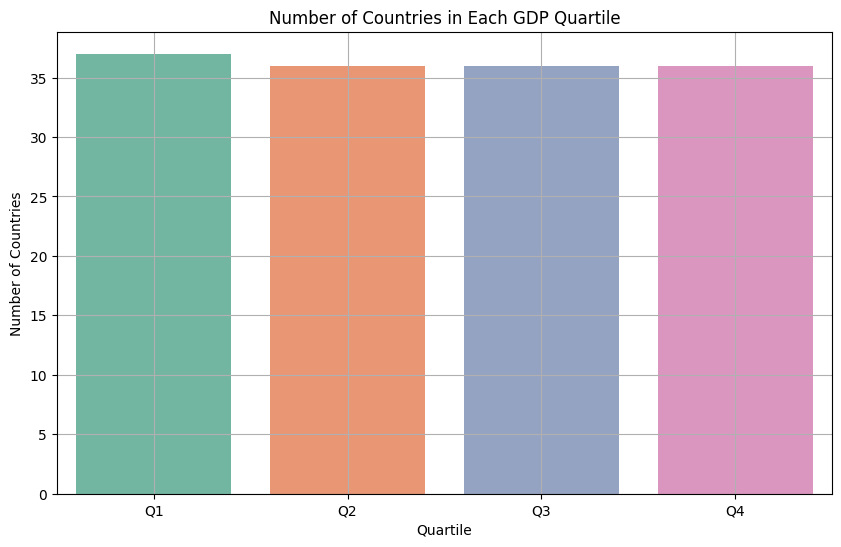

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of the number of countries in each quartile
plt.figure(figsize=(10, 6))
sns.countplot(x='Quartile', data=df_agg, hue='Quartile', palette='Set2')
plt.title('Number of Countries in Each GDP Quartile')
plt.xlabel('Quartile')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

In [42]:
quartile_dict = df_agg.set_index('Country')['Quartile'].to_dict()
print(quartile_dict)

{'Albania': 'Q2', 'Algeria': 'Q4', 'Angola': 'Q3', 'Antigua and Barbuda': 'Q1', 'Argentina': 'Q4', 'Armenia': 'Q2', 'Australia': 'Q4', 'Austria': 'Q4', 'Azerbaijan': 'Q3', 'Bahrain': 'Q2', 'Bangladesh': 'Q4', 'Barbados': 'Q1', 'Belarus': 'Q3', 'Belgium': 'Q4', 'Belize': 'Q1', 'Benin': 'Q1', 'Bhutan': 'Q1', 'Bolivia': 'Q2', 'Bosnia and Herzegovina': 'Q2', 'Botswana': 'Q2', 'Brazil': 'Q4', 'Bulgaria': 'Q3', 'Burkina Faso': 'Q2', 'Burundi': 'Q1', 'Cambodia': 'Q2', 'Cameroon': 'Q2', 'Canada': 'Q4', 'Central African Republic': 'Q1', 'Chad': 'Q1', 'Chile': 'Q3', 'China': 'Q4', 'Colombia': 'Q4', 'Comoros': 'Q1', 'Costa Rica': 'Q2', "Cote d'Ivoire": 'Q3', 'Croatia': 'Q3', 'Cyprus': 'Q1', 'Czechia': 'Q3', 'Denmark': 'Q3', 'Djibouti': 'Q1', 'Dominican Republic': 'Q3', 'Ecuador': 'Q3', 'El Salvador': 'Q2', 'Equatorial Guinea': 'Q2', 'Estonia': 'Q2', 'Eswatini': 'Q1', 'Ethiopia': 'Q3', 'Fiji': 'Q1', 'Finland': 'Q3', 'France': 'Q4', 'Gabon': 'Q1', 'Georgia': 'Q2', 'Germany': 'Q4', 'Ghana': 'Q3', 'G

In [18]:
gdp_df

_id   Country Code  Year          GDP  Ag_perc_GDP  \
0     66e8ea07f7ae5334e5328b28   Albania  ALB  1996  15067375000     0.364109   
1     66e8ea07f7ae5334e5328b29   Albania  ALB  1997  14072310000     0.315434   
2     66e8ea07f7ae5334e5328b2a   Albania  ALB  1998  15531704000     0.287857   
3     66e8ea07f7ae5334e5328b2b   Albania  ALB  1999  16525398000     0.259187   
4     66e8ea07f7ae5334e5328b2c   Albania  ALB  2000  16633271000     0.245154   
...                        ...       ...  ...   ...          ...          ...   
3992  66e8ea07f7ae5334e5329ac0  Zimbabwe  ZWE  2015  39798645000     0.082842   
3993  66e8ea07f7ae5334e5329ac1  Zimbabwe  ZWE  2016  40963190000     0.078740   
3994  66e8ea07f7ae5334e5329ac2  Zimbabwe  ZWE  2017  44316740000     0.083410   
3995  66e8ea07f7ae5334e5329ac3  Zimbabwe  ZWE  2018  43420897000     0.073194   
3996  66e8ea07f7ae5334e5329ac4  Zimbabwe  ZWE  2019  40826570000     0.098193   

          Agri_GDP  
0     5.486161e+09  
1     4.438891e+09  
2     4.470902e+09  
3     4.283176e+09  
4     4.077715e+09  
...            ...  
3992  3.297018e+09  
3993  3.225436e+09  
3994  3.696446e+09  
3995  3.178138e+09  
3996  4.008868e+09  

[3997 rows x 7 columns]

In [45]:
gdp_df['Quartile'] = gdp_df['Country'].map(quartile_dict)
print(gdp_df.head())

                        _id  Country Code  Year          GDP  Ag_perc_GDP  \
0  66e8ea07f7ae5334e5328b28  Albania  ALB  1996  15067375000     0.364109   
1  66e8ea07f7ae5334e5328b29  Albania  ALB  1997  14072310000     0.315434   
2  66e8ea07f7ae5334e5328b2a  Albania  ALB  1998  15531704000     0.287857   
3  66e8ea07f7ae5334e5328b2b  Albania  ALB  1999  16525398000     0.259187   
4  66e8ea07f7ae5334e5328b2c  Albania  ALB  2000  16633271000     0.245154   

       Agri_GDP   Z-Score  Z-Score_gdp  Z-Score_Agri_GDP Quartile  
0  5.486161e+09 -0.274465    -0.274465         -0.200633       Q2  
1  4.438891e+09 -0.275034    -0.275034         -0.209208       Q2  
2  4.470902e+09 -0.274199    -0.274199         -0.208946       Q2  
3  4.283176e+09 -0.273631    -0.273631         -0.210483       Q2  
4  4.077715e+09 -0.273570    -0.273570         -0.212165       Q2  


In [46]:
gdp_df

_id   Country Code  Year          GDP  Ag_perc_GDP  \
0     66e8ea07f7ae5334e5328b28   Albania  ALB  1996  15067375000     0.364109   
1     66e8ea07f7ae5334e5328b29   Albania  ALB  1997  14072310000     0.315434   
2     66e8ea07f7ae5334e5328b2a   Albania  ALB  1998  15531704000     0.287857   
3     66e8ea07f7ae5334e5328b2b   Albania  ALB  1999  16525398000     0.259187   
4     66e8ea07f7ae5334e5328b2c   Albania  ALB  2000  16633271000     0.245154   
...                        ...       ...  ...   ...          ...          ...   
3992  66e8ea07f7ae5334e5329ac0  Zimbabwe  ZWE  2015  39798645000     0.082842   
3993  66e8ea07f7ae5334e5329ac1  Zimbabwe  ZWE  2016  40963190000     0.078740   
3994  66e8ea07f7ae5334e5329ac2  Zimbabwe  ZWE  2017  44316740000     0.083410   
3995  66e8ea07f7ae5334e5329ac3  Zimbabwe  ZWE  2018  43420897000     0.073194   
3996  66e8ea07f7ae5334e5329ac4  Zimbabwe  ZWE  2019  40826570000     0.098193   

          Agri_GDP   Z-Score  Z-Score_gdp  Z-Score_Agri_GDP Quartile  
0     5.486161e+09 -0.274465    -0.274465         -0.200633       Q2  
1     4.438891e+09 -0.275034    -0.275034         -0.209208       Q2  
2     4.470902e+09 -0.274199    -0.274199         -0.208946       Q2  
3     4.283176e+09 -0.273631    -0.273631         -0.210483       Q2  
4     4.077715e+09 -0.273570    -0.273570         -0.212165       Q2  
...            ...       ...          ...               ...      ...  
3992  3.297018e+09 -0.260329    -0.260329         -0.218558       Q2  
3993  3.225436e+09 -0.259663    -0.259663         -0.219144       Q2  
3994  3.696446e+09 -0.257746    -0.257746         -0.215287       Q2  
3995  3.178138e+09 -0.258258    -0.258258         -0.219531       Q2  
3996  4.008868e+09 -0.259741    -0.259741         -0.212729       Q2  

[3997 rows x 11 columns]

In [50]:
gdp_q1 = gdp_df[gdp_df['Quartile']== 'Q1']
gdp_q1

gdp_q2 = gdp_df[gdp_df['Quartile'] =='Q2']
gdp_q2

gdp_q3 = gdp_df[gdp_df['Quartile'] =='Q3']
gdp_q3

gdp_q4 = gdp_df[gdp_df['Quartile'] =='Q4']
gdp_q4

_id        Country Code  Year             GDP  \
24    66e8ea07f7ae5334e5328b40        Algeria  DZA  1999    272028660000   
25    66e8ea07f7ae5334e5328b41        Algeria  DZA  2000    301252000000   
26    66e8ea07f7ae5334e5328b42        Algeria  DZA  2001    303689430000   
27    66e8ea07f7ae5334e5328b43        Algeria  DZA  2002    314770200000   
28    66e8ea07f7ae5334e5328b44        Algeria  DZA  2003    343126670000   
...                        ...            ...  ...   ...             ...   
3902  66e8ea07f7ae5334e5329a66  United States  USA  2015  18785359000000   
3903  66e8ea07f7ae5334e5329a67  United States  USA  2016  19095196000000   
3904  66e8ea07f7ae5334e5329a68  United States  USA  2017  19542980000000   
3905  66e8ea07f7ae5334e5329a69  United States  USA  2018  20155260000000   
3906  66e8ea07f7ae5334e5329a6a  United States  USA  2019  20595845000000   

      Ag_perc_GDP      Agri_GDP    Z-Score  Z-Score_gdp  Z-Score_Agri_GDP  \
24       0.111070  3.021417e+10  -0.127586    -0.127586          0.001845   
25       0.083950  2.529025e+10  -0.110883    -0.110883         -0.038473   
26       0.097494  2.960796e+10  -0.109489    -0.109489         -0.003119   
27       0.092250  2.903749e+10  -0.103156    -0.103156         -0.007790   
28       0.098106  3.366264e+10  -0.086947    -0.086947          0.030082   
...           ...           ...        ...          ...               ...   
3902     0.010339  1.942282e+11  10.454583    10.454583          1.344824   
3903     0.009426  1.799998e+11  10.631685    10.631685          1.228320   
3904     0.009469  1.850464e+11  10.887637    10.887637          1.269642   
3905     0.009039  1.821835e+11  11.237614    11.237614          1.246200   
3906     0.008388  1.727606e+11  11.489451    11.489451          1.169044   

     Quartile  
24         Q4  
25         Q4  
26         Q4  
27         Q4  
28         Q4  
...       ...  
3902       Q4  
3903       Q4  
3904       Q4  
3905       Q4  
3906       Q4  

[1017 rows x 11 columns]

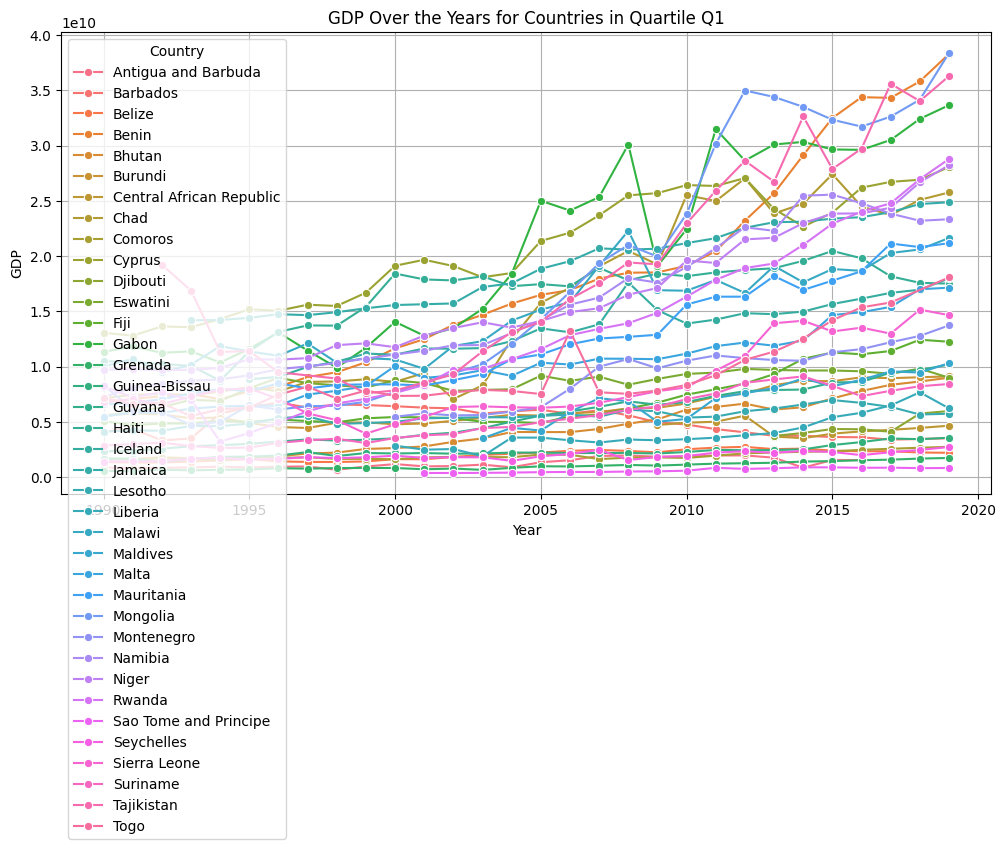

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q1, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q1')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

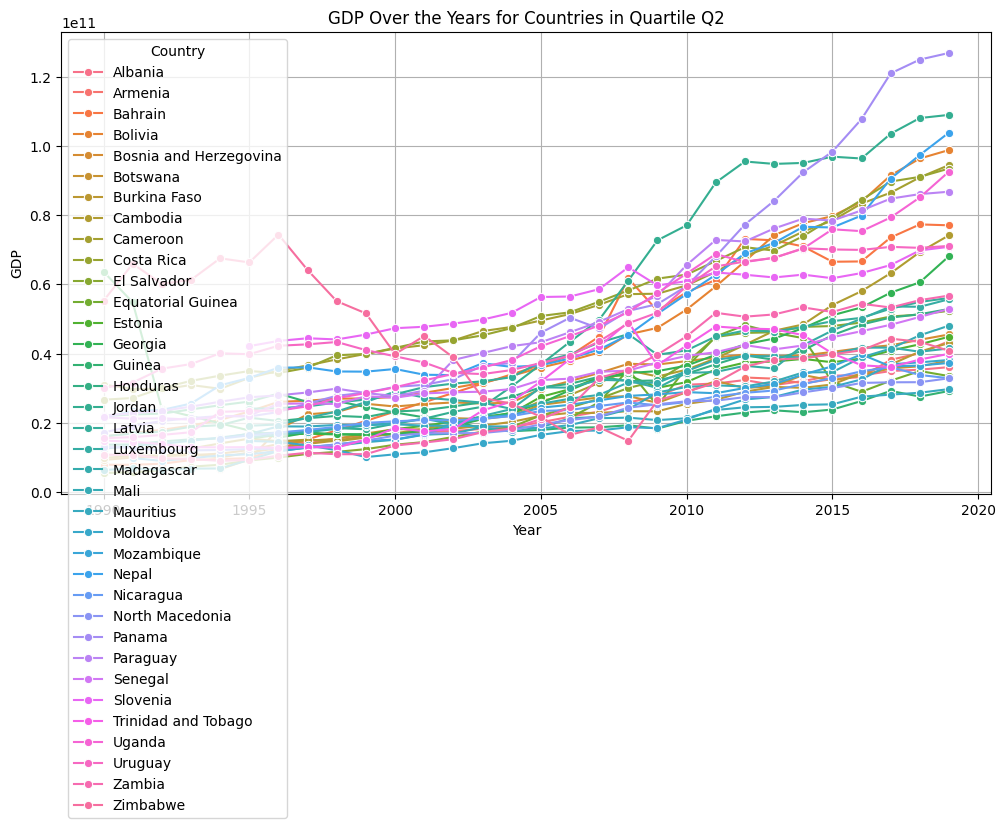

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q2, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q2')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

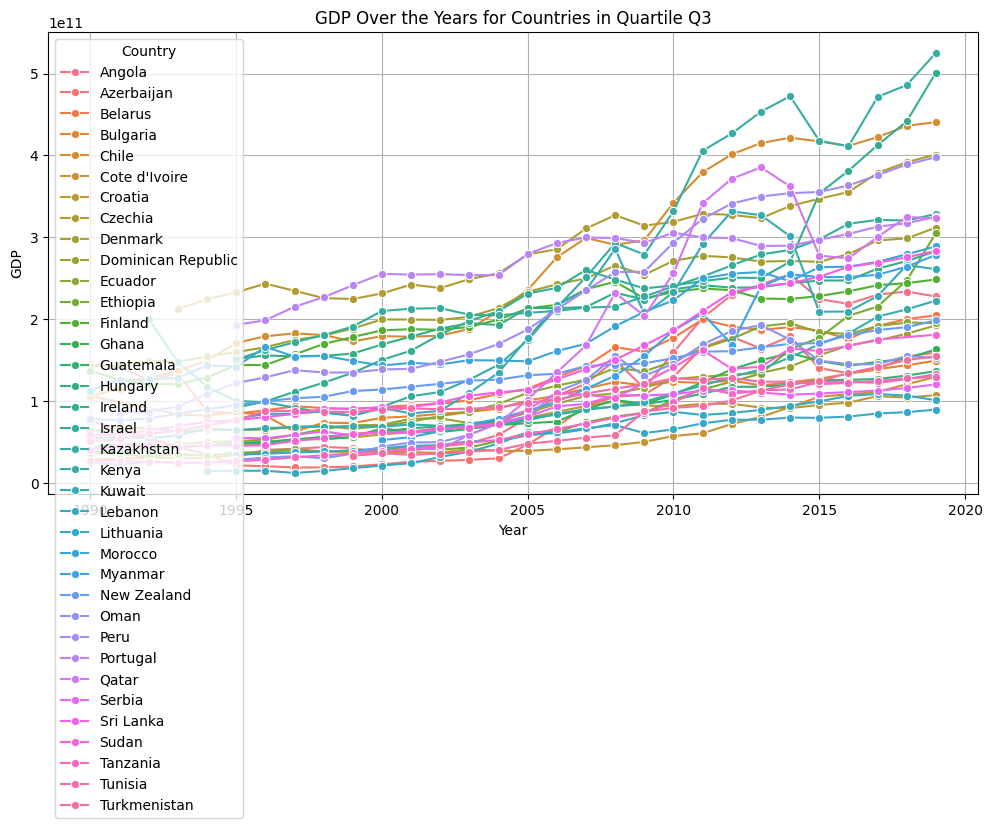

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q3, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q3')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()

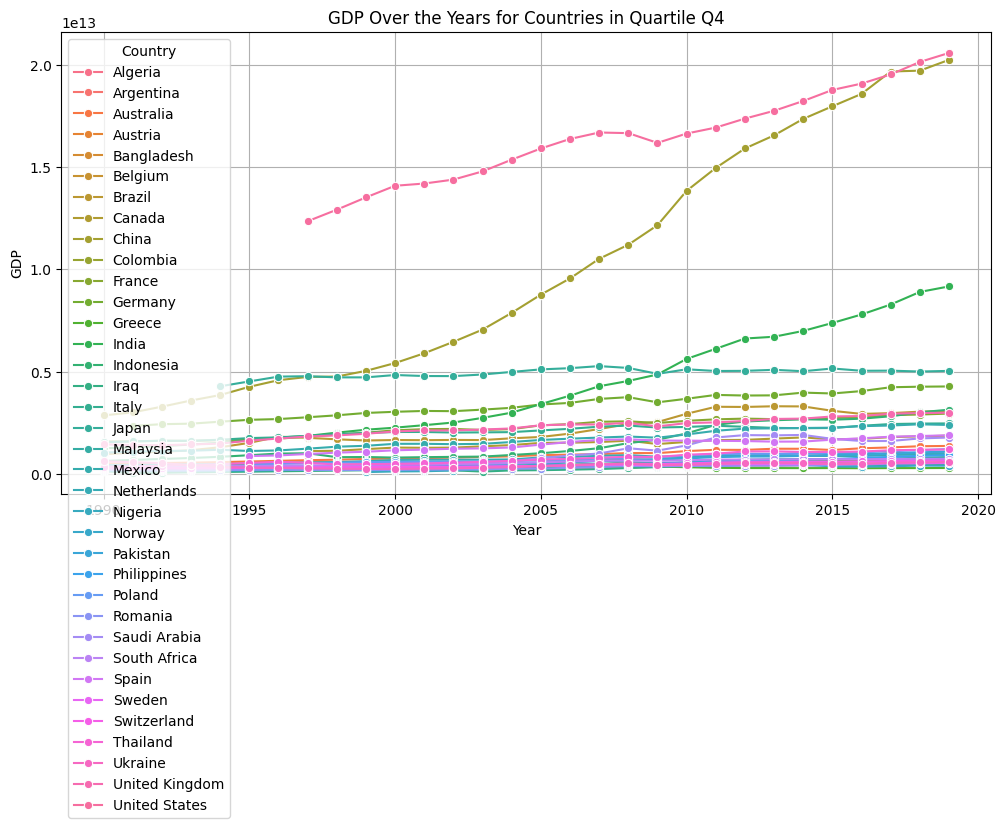

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=gdp_q4, x='Year', y='GDP', hue='Country', marker='o')

# Customize the plot
plt.title(f'GDP Over the Years for Countries in Quartile Q4')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(title='Country')
plt.grid(True)

# Show the plot
plt.show()